# 🏠 Handling Skewed Data with Transformations: Ames Housing Dataset
In this notebook, we demonstrate how to identify and correct skewed numeric features using logarithmic and power transformations in the Ames Housing dataset.

## Step 1: Import Required Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the Ames Housing Dataset

In [7]:
df = pd.read_csv("AmesHousing.csv")
df.shape

(2930, 82)

In [9]:
print(df.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

## Step 3: View Sample Data and Summary Statistics

In [10]:
df[['SalePrice', 'Gr Liv Area', 'Total Bsmt SF', 'Lot Frontage']].describe()

,SalePrice,Gr Liv Area,Total Bsmt SF,Lot Frontage
count,2930.000000,2930.000000,2929.000000,2440.000000
mean,180796.060068,1499.690444,1051.614544,69.224590
std,79886.692357,505.508887,440.615067,23.365335
min,12789.000000,334.000000,0.000000,21.000000
25%,129500.000000,1126.000000,793.000000,58.000000
50%,160000.000000,1442.000000,990.000000,68.000000
75%,213500.000000,1742.750000,1302.000000,80.000000
max,755000.000000,5642.000000,6110.000000,313.000000


## Step 4: Visualize Distributions of Skewed Features

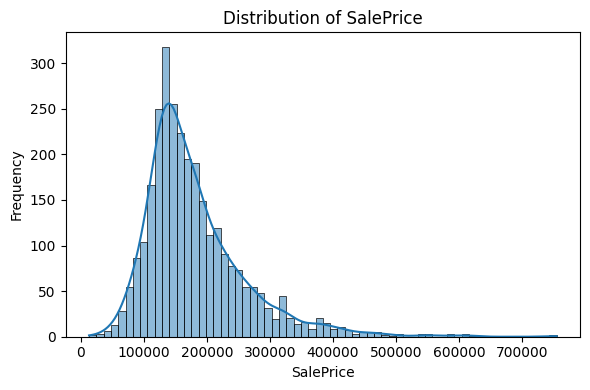

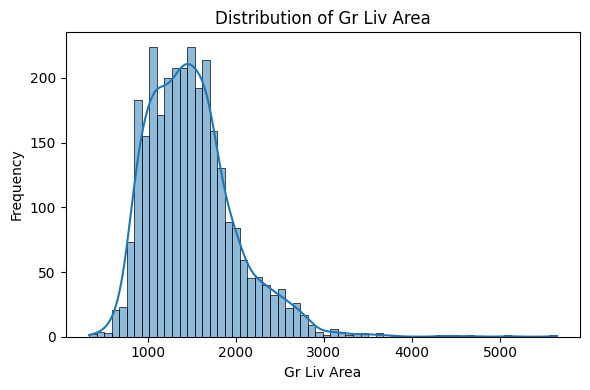

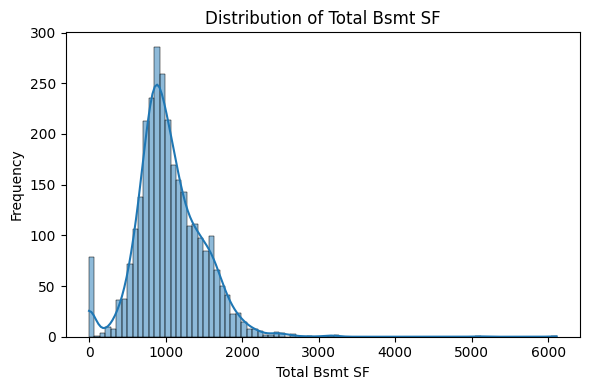

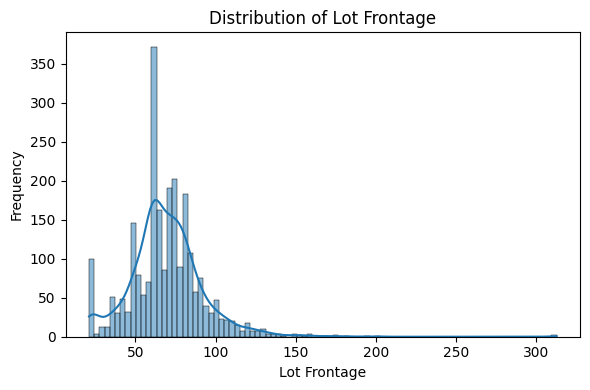

In [12]:
skewed_cols = ['SalePrice', 'Gr Liv Area', 'Total Bsmt SF', 'Lot Frontage']

for col in skewed_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

## Step 5: Apply Log Transformation to Right-Skewed Features

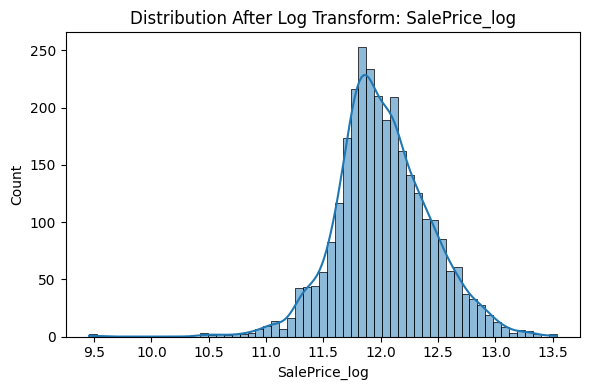

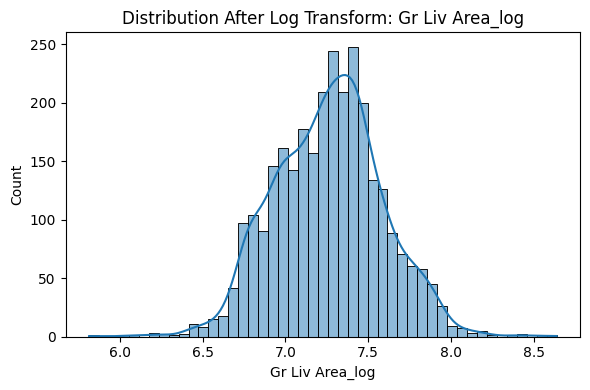

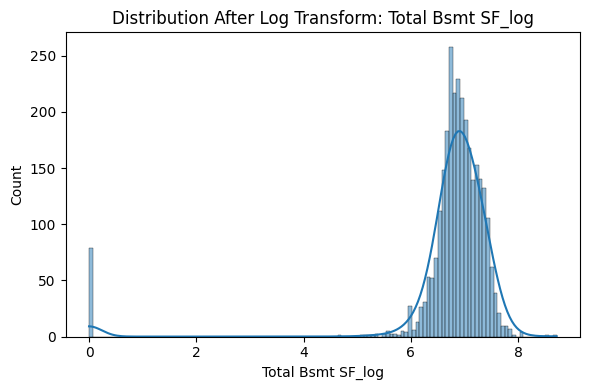

In [15]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])
df['Gr Liv Area_log'] = np.log1p(df['Gr Liv Area'])
df['Total Bsmt SF_log'] = np.log1p(df['Total Bsmt SF'])

# Plot again after transformation
for col in ['SalePrice_log', 'Gr Liv Area_log', 'Total Bsmt SF_log']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution After Log Transform: {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## Step 6: Apply Yeo-Johnson Power Transformation

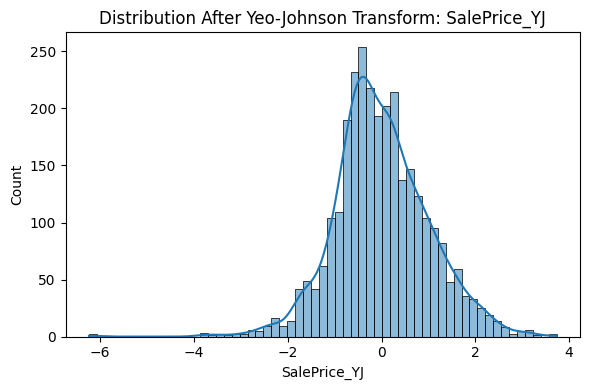

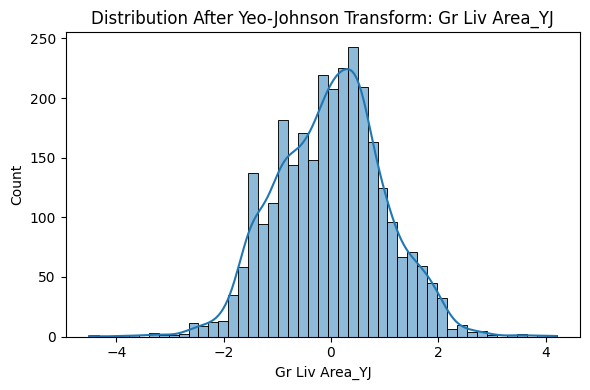

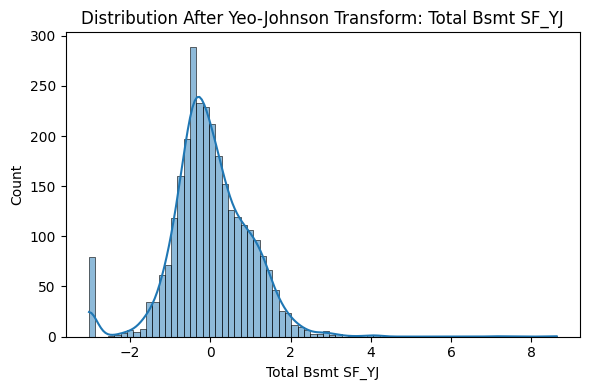

In [16]:
pt = PowerTransformer(method='yeo-johnson')
yeo_data = pt.fit_transform(df[['SalePrice', 'Gr Liv Area', 'Total Bsmt SF']].dropna())
yeo_df = pd.DataFrame(yeo_data, columns=['SalePrice_YJ', 'Gr Liv Area_YJ', 'Total Bsmt SF_YJ'])

# Visualize
for col in yeo_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(yeo_df[col], kde=True)
    plt.title(f"Distribution After Yeo-Johnson Transform: {col}")
    plt.tight_layout()
    plt.show()

## Step 7: Compare Linear Regression Before vs After Transformation

In [18]:
# Prepare before-transformation dataset
X1 = df[['Gr Liv Area']].dropna()
y1 = df.loc[X1.index, 'SalePrice']

# After log transformation
X2 = df[['Gr Liv Area_log']].dropna()
y2 = df.loc[X2.index, 'SalePrice_log']

# Fit both models
model1 = LinearRegression().fit(X1, y1)
model2 = LinearRegression().fit(X2, y2)

# Predict and score
y1_pred = model1.predict(X1)
y2_pred = model2.predict(X2)

print("Original Model R^2:", r2_score(y1, y1_pred))
print("Transformed Model R^2 (Log):", r2_score(y2, y2_pred))

Original Model R^2: 0.49953785669572837
Transformed Model R^2 (Log): 0.5229660780585348


## Step 8: Scatter Plots of Model Fit

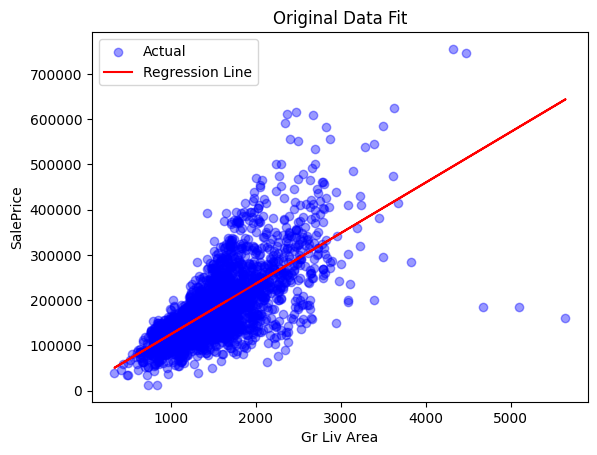

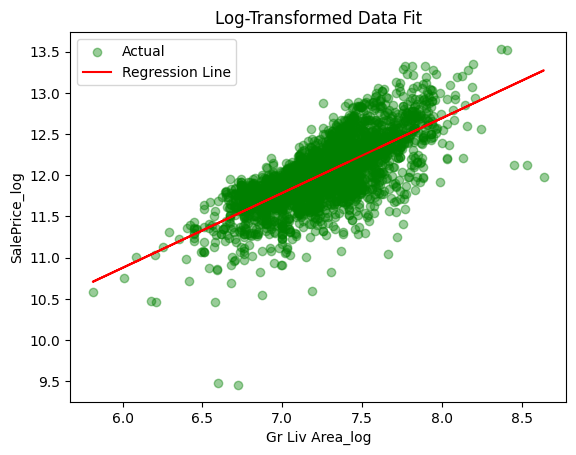

In [19]:
# Before
plt.scatter(X1, y1, color='blue', alpha=0.4, label='Actual')
plt.plot(X1, y1_pred, color='red', label='Regression Line')
plt.title("Original Data Fit")
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

# After log transform
plt.scatter(X2, y2, color='green', alpha=0.4, label='Actual')
plt.plot(X2, y2_pred, color='red', label='Regression Line')
plt.title("Log-Transformed Data Fit")
plt.xlabel("Gr Liv Area_log")
plt.ylabel("SalePrice_log")
plt.legend()
plt.show()